In [3]:
import os
import nltk
from nltk import FreqDist, Text
import matplotlib.pyplot as plt

os.getcwd()
os.chdir('/Users/giulia/Desktop')

In [4]:
#create a dict with tier and annotation - original
ann_list = list()
with open('tryo.txt', 'r') as infile:
    for line in infile:
        parts = line.strip().split('\t')

        tier = parts[0]
        annotation = parts[-1].lower()

        ann_dict = {
            'tier': tier,
            'annotation': annotation
        }

        ann_list.append(ann_dict)
    
print(ann_list)

#here extract only annotation content
annotation_list = []  
for dics in ann_list:
    annotation_list.append(dics['annotation'])

print(annotation_list)

[{'tier': 'Speaker1', 'annotation': 'we just ↑remi[nisce]'}, {'tier': 'Speaker1', 'annotation': '[eh]'}, {'tier': 'Speaker1', 'annotation': "'kay"}, {'tier': 'Speaker1', 'annotation': 'm::h hhh ((tsk))'}, {'tier': 'Speaker1', 'annotation': "but i'm tryin' to think which memory is (0.6) within five minutes because they're all short (.) cute moments"}, {'tier': 'Speaker1', 'annotation': 'okay i (.) would (.) .hhh'}, {'tier': 'Speaker1', 'annotation': ".hhh >°i don't know°< could be about the: (.) the camera cap"}, {'tier': 'Speaker1', 'annotation': '[that] (.) ((laugh 0.5)) on our first trip (1.6) >to london a year ago<'}, {'tier': 'Speaker1', 'annotation': '°do we° just launch into the memo[ry]'}, {'tier': 'Speaker1', 'annotation': 'but do you remember how you lost the: (.) camera cap (0.4) at the airport check in'}, {'tier': 'Speaker1', 'annotation': 'is that not a good memory'}, {'tier': 'Speaker1', 'annotation': '[>because<]'}, {'tier': 'Speaker1', 'annotation': '[neck]'}, {'tier': '

In [5]:
#function to clean annotations
def clean_text(datalist, remove_seq=True, remove_char=True):
    if remove_seq is True:
        remove_seq = ['(.)', '(h)', '(?)','(???)', '((cough))', '((laugh))', '((laughs))', '((tsk))', '.hhh', 'hhh', 'laugh', '0.4', '0.5', '0.7', '1.0', '1.6', '2.0', '2.6', '0.8', '2.3', '2.1', '0.6'] #remove discourse signals
    if remove_char is True:
        remove_char = '[]><°:,↓↑-()' 
    
    clean_data = []
    for text in datalist:
        for seq in remove_seq:
            #text = text.replace("'", ' ') #remove for content analysis 
            text = text.replace('=', ' ')
            text = text.replace(seq, '')
            text = text.replace('  ', ' ')

        cleaned = ''
        for ch in text:
            if ch in remove_char:
                continue
            cleaned += ch

        clean_data.append(cleaned.strip())
    
    return clean_data

 From the original txt file, only 'tier' and 'annotation' content were kept. Since the required analysis had to be done on token level, I did want to have clean text. For this reason, I removed discourse signals, including pauses and behavioural interferences (coughing, laughing, other mouthed noises). Regarding elan annotations, I decided not to include any annotation character.

In [6]:
#split annotations for each tier + cleaning
FR_list = []
RA_list = []

for dics in ann_list:
    if dics['tier'] == 'Speaker1':
        FR_list.append(dics['annotation'])
    if dics['tier'] == 'Speaker2':
        RA_list.append(dics['annotation'])

clean_FR = clean_text(FR_list)
clean_RA = clean_text(RA_list)

In this snippet I made sure to have three lists: one for each tier and one for general analysis.

In [7]:
#print(clean_RA)
#print(clean_FR)
combined_clean = clean_FR + clean_RA
print(combined_clean) #combine annotations for general inspection

['we just reminisce', 'eh', "'kay", 'mh', "but i'm tryin' to think which memory is  within five minutes because they're all short cute moments", 'okay i would', "i don't know could be about the the camera cap", 'that   on our first trip  to london a year ago', 'do we just launch into the memory', 'but do you remember how you lost the camera cap  at the airport check in', 'is that not a good memory', 'because', 'neck', 'we had a lot of luggage', 'for four days', 'for four days', 'i think you have you just picked up your camera and then the front cap of the camera fell into the belt', 'i think it fell off outside already maybe a few times', 'the conveyor belt', 'into the machinery of the actual airport', 's  it was', '', 'the first trip with blurry pictures', "they end up blurred anyway 'cause i'm terrible at taking photos", "and we're clumsy", "but i feel like maybe today w because we've", 'the cap is over there', "and it still hasn't been cleaned  from having been down in the gutter at

## GENERAL ANALYSIS

In [8]:
token_list = []
for item in combined_clean:
    tokenized = nltk.word_tokenize(item)
    token_list.extend(tokenized)
#print(token_list)

if "'" in token_list:
    token_list.remove("'") #i remove it here because i wanted to keep nltk punct tokenization but i had abbreviations (eg. tryin')

print(token_list)

print('Total number of tokens:', len(token_list))

['we', 'just', 'reminisce', 'eh', "'kay", 'mh', 'but', 'i', "'m", 'tryin', 'to', 'think', 'which', 'memory', 'is', 'within', 'five', 'minutes', 'because', 'they', "'re", 'all', 'short', 'cute', 'moments', 'okay', 'i', 'would', 'i', 'do', "n't", 'know', 'could', 'be', 'about', 'the', 'the', 'camera', 'cap', 'that', 'on', 'our', 'first', 'trip', 'to', 'london', 'a', 'year', 'ago', 'do', 'we', 'just', 'launch', 'into', 'the', 'memory', 'but', 'do', 'you', 'remember', 'how', 'you', 'lost', 'the', 'camera', 'cap', 'at', 'the', 'airport', 'check', 'in', 'is', 'that', 'not', 'a', 'good', 'memory', 'because', 'neck', 'we', 'had', 'a', 'lot', 'of', 'luggage', 'for', 'four', 'days', 'for', 'four', 'days', 'i', 'think', 'you', 'have', 'you', 'just', 'picked', 'up', 'your', 'camera', 'and', 'then', 'the', 'front', 'cap', 'of', 'the', 'camera', 'fell', 'into', 'the', 'belt', 'i', 'think', 'it', 'fell', 'off', 'outside', 'already', 'maybe', 'a', 'few', 'times', 'the', 'conveyor', 'belt', 'into', 'th

<Axes: xlabel='Samples', ylabel='Counts'>

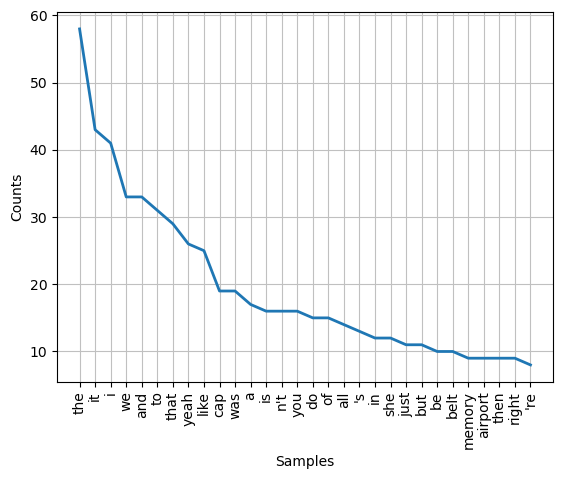

In [9]:
fdist = FreqDist(token_list)
fdist.plot(30)

Nice to observe firsthand a zipfian lexical distribution, like we would expect from a corpus analysis.

In [10]:
#see explicitly the word counts
print(fdist.most_common())

[('the', 58), ('it', 43), ('i', 41), ('we', 33), ('and', 33), ('to', 31), ('that', 29), ('yeah', 26), ('like', 25), ('cap', 19), ('was', 19), ('a', 17), ('is', 16), ("n't", 16), ('you', 16), ('do', 15), ('of', 15), ('all', 14), ("'s", 13), ('in', 12), ('she', 12), ('just', 11), ('but', 11), ('be', 10), ('belt', 10), ('memory', 9), ('airport', 9), ('then', 9), ('right', 9), ("'re", 8), ('trip', 8), ('up', 8), ('my', 8), ('so', 8), ('think', 7), ('on', 7), ('first', 7), ('how', 7), ('not', 7), ('had', 7), ('for', 7), ('has', 7), ('even', 7), ('this', 7), ('yes', 7), ('two', 7), ('went', 7), ("'m", 6), ('which', 6), ('know', 6), ('camera', 6), ('?', 6), ('did', 6), ('can', 6), ('what', 6), ('they', 5), ('could', 5), ('into', 5), ('remember', 5), ('at', 5), ('have', 5), ('your', 5), ('fell', 5), ('still', 5), ('washed', 5), ('get', 5), ('go', 5), ('no', 5), ('because', 4), ('would', 4), ('our', 4), ('luggage', 4), ('days', 4), ('times', 4), ('there', 4), ('been', 4), ('whole', 4), ('he', 4

In [11]:
#type/token ratio
ttr = len(set(token_list))/(len(token_list))
print('Total unique words:', len(set(token_list)))
print('Total tokens:', len(token_list))
print('Type/token ratio:', ttr)

Total unique words: 337
Total tokens: 1263
Type/token ratio: 0.2668250197941409


As the TTR shows us, zipfian distribution is very evident. There are many words that get repeated and few words (maybe domain-specific words, like in this case) that appear less often or just once. A TTR closer to zero means that there is indeed a lot of word repetition.

In [12]:
# i was not able to do sentence splitting directly on elan
#so i'm counting annotation lengths. still meaningful because this is natural speech 'sentence splitting'
sentence_lengths = []

for item in combined_clean:
    sentences = nltk.sent_tokenize(item)
    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence)
        count = len(tokens)
        sentence_lengths.append(count)
print("Total sentences:", len(sentence_lengths))
print("Average tokens per sentence:", sum(sentence_lengths) / len(sentence_lengths))
print("Min:", min(sentence_lengths), "Max:", max(sentence_lengths))

Total sentences: 183
Average tokens per sentence: 6.907103825136612
Min: 1 Max: 27


Since I was not able to execute sentence splitting on elan, I decided to carry out the analysis anyway, but with annotation instead of sentence splitting. I thought it would still be interesting since the annotations were made according to sound production: my annotations try to reproduce as accurately as possibile the speakers' natural and spontaneous sentence splitting, even if it means, most of the times, that the sentences are truncated or the ordinary SVO structure is not respected.
It is necessary to admit also that very many words are also truncated, meaning that the number of tokens is actually somewhat higher than actual (full) word count. 

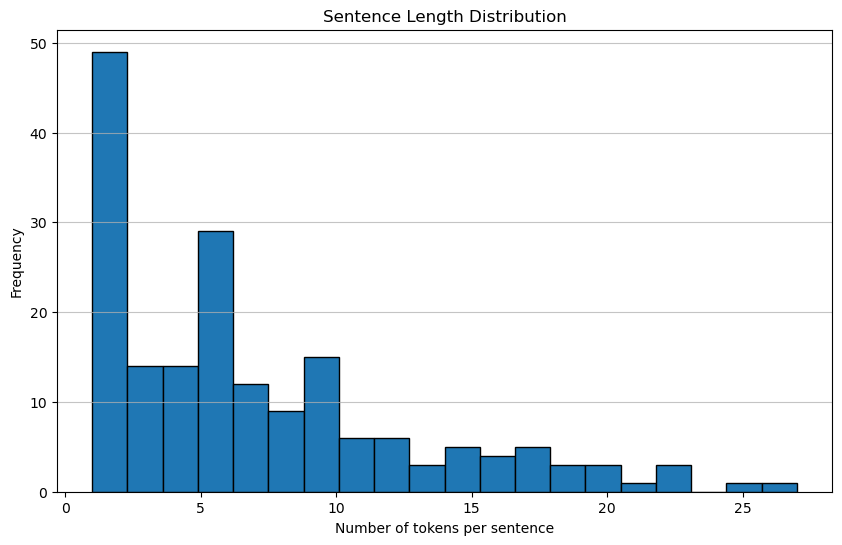

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=20, edgecolor='black')
plt.title("Sentence Length Distribution")
plt.xlabel("Number of tokens per sentence")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

From the bar plot, we can see that the majority of the sentences were under ten words. This is expected for spoken dialogues.

In [14]:
#function vs content word - general 

def function_vs_content(tokenlist):
    from nltk.corpus import stopwords
    stops = stopwords.words('english')

    extrastop = [
        'eh', 'kay', 'mh', "m", 'within', 'okay', 'would', 'could', 'ago', 'maybe',
        'anyway', 'cause', 'w', 'tha', 'actually', '?', 'mh', 'yeah', 'ye', 'either',
        'even', 'like', 'maybe', 'also', 'could', 'anything', 'someone', 'else',
        'te', 'per', 'would', 'still', 'uh', 'ehm', 'many', 'though', 'gon', 'na',
        'ever', 'since', 'cause', 'behind', 'lik', 'also', 'us', 'even', 'uhm']

    stopset = set(stops + extrastop)
    function_words = []
    content_words  = []

    for el in tokenlist:
        word = el.lower()
        if word in stopset:
            function_words.append(el)
        else:
            content_words.append(el)

    n_func = len(function_words)
    n_cont = len(content_words)
    total  = len(tokenlist)

    p_func = n_func / total
    p_cont = n_cont / total

    print(f"Number of function words: {n_func}")
    print(f"Number of content words: {n_cont}")
    print(f"Total tokens: {total}")

    print()
    print(f"Function words proportion: {p_func:.2%}")
    print(f"Content words proportion: {p_cont:.2%}")

    return p_func, p_cont

p_func, p_cont = function_vs_content(token_list)

Number of function words: 780
Number of content words: 483
Total tokens: 1263

Function words proportion: 61.76%
Content words proportion: 38.24%


Comparison between function words and content words has also given expected results. Since speech is not programmed, it is rich with grammatical words, like pronouns that refer to the people present in the situation, filler words, auxiliaries, etc.

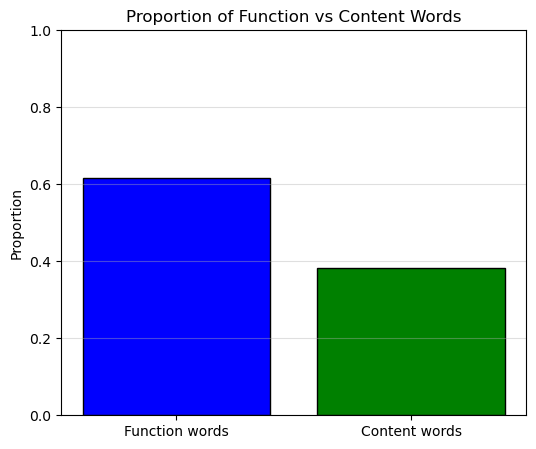

In [15]:
labels = ['Function words', 'Content words']
values = [p_func, p_cont]

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['blue', 'green'], edgecolor='black')
plt.title("Proportion of Function vs Content Words")
plt.ylabel("Proportion")
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.4)
plt.show()

In [16]:
with open("LaD1_clean.txt", "w", encoding="utf-8") as outfile:
    for line in combined_clean:
        outfile.write(line + "\n")

with open("LaD1_clean.txt", "r", encoding="utf-8") as f:
    text_data = f.read()
    print(text_data)

we just reminisce
eh
'kay
mh
but i'm tryin' to think which memory is  within five minutes because they're all short cute moments
okay i would
i don't know could be about the the camera cap
that   on our first trip  to london a year ago
do we just launch into the memory
but do you remember how you lost the camera cap  at the airport check in
is that not a good memory
because
neck
we had a lot of luggage
for four days
for four days
i think you have you just picked up your camera and then the front cap of the camera fell into the belt
i think it fell off outside already maybe a few times
the conveyor belt
into the machinery of the actual airport
s  it was

the first trip with blurry pictures
they end up blurred anyway 'cause i'm terrible at taking photos
and we're clumsy
but i feel like maybe today w because we've
the cap is over there
and it still hasn't been cleaned  from having been down in the gutter at the air
tha y you see the cap was actually found
yesterday
and 1.1 it needs to be 

To analyse discourse markers it was easier for me to re-create a txt to look for them with regex.

In [17]:
#DISCOURSE MARKERS 
#single words i use text.count
text_clean = Text(token_list)
print('Occurrences of LIKE:', text_clean.count('like'))
print('Occurrences of WELL:', text_clean.count('well'))
print('Occurrences of YEAH:', text_clean.count('yeah'))
print('Occurrences of RIGHT:', text_clean.count('right'))
print('Occurrences of LITERALLY:', text_clean.count('literally'))
print('Occurrences of SO:', text_clean.count('so'))
print('Occurrences of ANYWAY:', text_clean.count('anyway')) #if i remember correctly its not a discourse marker in here
print('Occurrences of ACTUALLY:', text_clean.count('actually'))

Occurrences of LIKE: 25
Occurrences of WELL: 1
Occurrences of YEAH: 26
Occurrences of RIGHT: 9
Occurrences of LITERALLY: 4
Occurrences of SO: 8
Occurrences of ANYWAY: 1
Occurrences of ACTUALLY: 2


In [18]:
#multi-words i use regex
import re
pattern1 = r"\byou\s+know\b"
you_know_count = len(re.findall(pattern1, text_data))
print('Occurrences of YOU KNOW:', you_know_count)
pattern2 = r"\bi\s*mean\b"
i_mean_count = len(re.findall(pattern2, text_data))
print('Occurrences of I MEAN:', i_mean_count)

Occurrences of YOU KNOW: 2
Occurrences of I MEAN: 0


For discourse markers, naturally very frequent in conversational speech, we can notice a remarkable dominance of 'like' and 'yeah'. If we observe at the content of the recording, we can notice that the two persons talking both remember very accurately the episode they are describing, so to me the number of occurrences of 'yeah' is motivated by this. The number of occurrences of 'like' is also somewhat unsurprising since it is a very common filler word in the English language (the same phenomenon, interestingly for the exact same use, appears in Italian with 'tipo' and in Russian with 'ти́па'). Filler words like this one help the dialogue to run more smoothly and/or also give the speaker more time to think what to say next.

In [19]:
#concordance feature

text_clean = Text(token_list)
text_clean.concordance('like')

Displaying 25 of 25 matches:
 photos and we 're clumsy but i feel like maybe today w because we 've the cap
ve she did n't even attempt 0.3 with like a pen maybe a magnet yeah yeah ? ? a
shared memory which memory would you like mh yeah we we 'll probably spend mor
the memory ? i do n't know yeah no i like the memory just tryin ' to think of 
memory just tryin ' to think of what like 1.4 it means yeah i like that memory
ink of what like 1.4 it means yeah i like that memory 'cause that was when we 
out it was our first trip and it was like can we have you know can we travel t
t to the airport and i had my camera like strapped on my 0.3 chest we which i 
ver do but then i would do and i had like the cap on it i remember that we had
as that the first time though i felt like it fell fo five or six times before 
t yes you 're right right and it was like deep in s yeah and all i could think
ake this whole trip with the exposed like lens and i 'm clumsy right and we 'r
bly build that airport 

From the concordance method, it is further analysed the distribution of 'like'. Out of 25 occurrences, we can observe the different uses of the word:
- 'like' in 'to feel like', perception or prediction: 3 occurrences
- 'like' to make an example or to compare: 3 occurrences
- 'like' in phrasal 'would like': 1 occurrence
- 'like' as 'to like + Obj': 2 occurrences
- 'to be like' for reported speech or thought: 8 occurrences
- 'like' as filler and/or discourse marker: 8 occurrences

It is very interesting that the word 'like' occurs more often in its more 'non-traditional' uses in spontaneous speech. 

## TIER SPECIFIC ANALYSIS

In [20]:
#tokenization
RA_token_list = []
FR_token_list = []

for item in clean_FR:
    tokenized = nltk.word_tokenize(item)
    FR_token_list.extend(tokenized)

for item in clean_RA:
    tokenized = nltk.word_tokenize(item)
    RA_token_list.extend(tokenized)

#print(token_list)
print('Total number of tokens for RA:', len(RA_token_list))
print('Total number of tokens for FR:', len(FR_token_list))


Total number of tokens for RA: 769
Total number of tokens for FR: 495


Slight imbalance between the two speakers.

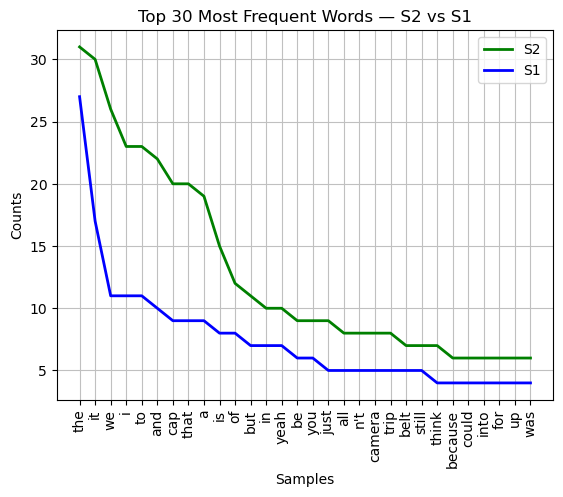

In [21]:
#plot both
fdist_RA = FreqDist(RA_token_list)
fdist_FR = FreqDist(FR_token_list)
fdist_RA.plot(30, color='green')
fdist_FR.plot(30, color='blue')
plt.legend(['S2', 'S1'])
plt.title("Top 30 Most Frequent Words — S2 vs S1")
plt.show()


We can see that the two speakers used the same words with a slightly different distribution.

In [22]:
#see explicit word counts
print(fdist_RA.most_common())
print(fdist_FR.most_common())

[('the', 31), ('i', 30), ('it', 26), ('like', 23), ('and', 23), ('we', 22), ('that', 20), ('to', 20), ('yeah', 19), ('was', 15), ('do', 12), ("n't", 11), ('you', 10), ('cap', 10), ('all', 9), ("'s", 9), ('she', 9), ('a', 8), ('right', 8), ('so', 8), ('is', 8), ('of', 7), ('went', 7), ('my', 7), ('memory', 6), ('just', 6), ('what', 6), ('airport', 6), ('then', 6), ("'re", 6), ('even', 6), ('which', 5), ('know', 5), ('no', 5), ('had', 5), ('belt', 5), ('yes', 5), ('in', 5), ('how', 4), ('this', 4), ('first', 4), ('can', 4), ('remember', 4), ('on', 4), ('but', 4), ('two', 4), ('up', 4), ("'m", 4), ('be', 4), ('literally', 4), ('did', 4), ('security', 4), ('not', 4), ('one', 3), ("'", 3), ('think', 3), ('when', 3), ('were', 3), ('out', 3), ('trip', 3), ('have', 3), ('luggage', 3), ('for', 3), ('fell', 3), ('whole', 3), ('lens', 3), ('washed', 3), ('ever', 3), ('they', 3), ('your', 3), ('has', 3), ('go', 3), ('get', 3), ('us', 3), ('about', 2), ('would', 2), ("'ll", 2), ('probably', 2), ('m

In [23]:
#type/token ratio
print('TTR statistics for RA:')
print('--')
ttr_RA = len(set(RA_token_list))/(len(RA_token_list))
print('Total unique words for RA:', len(set(RA_token_list)))
print('Total tokens for RA:', len(RA_token_list))
print('Type/token ratio for RA:', ttr_RA)
print()
print('TTR statistics for FR:')
print('--')
ttr_FR = len(set(FR_token_list))/(len(FR_token_list))
print('Total unique words for FR:', len(set(FR_token_list)))
print('Total tokens for FR:', len(FR_token_list))
print('Type/token ratio for FR:', ttr_FR)

TTR statistics for RA:
--
Total unique words for RA: 246
Total tokens for RA: 769
Type/token ratio for RA: 0.3198959687906372

TTR statistics for FR:
--
Total unique words for FR: 215
Total tokens for FR: 495
Type/token ratio for FR: 0.43434343434343436


Speaker FR shows a slightly higher TTR, meaning he used a more diverse vocabulary compared to speaker RA.

In [24]:
#annotation lengths
print('Sentence statistics for RA:')
print('--')
RA_sent_len = []

for item in clean_RA:
    sent = nltk.sent_tokenize(item)
    for sen in sent:
        tok = nltk.word_tokenize(sen)
        count = len(tok)
        RA_sent_len.append(count)
print("Total sentences:", len(RA_sent_len))
print("Average tokens per sentence:", sum(RA_sent_len) / len(RA_sent_len))
print("Min:", min(RA_sent_len), "Max:", max(RA_sent_len))
print()

print('Sentence statistics for FR:')
print('--')
FR_sent_len = []

for item in clean_FR:
    sent = nltk.sent_tokenize(item)
    for sen in sent:
        tok = nltk.word_tokenize(sen)
        count = len(tok)
        FR_sent_len.append(count)
print("Total sentences:", len(FR_sent_len))
print("Average tokens per sentence:", sum(FR_sent_len) / len(FR_sent_len))
print("Min:", min(FR_sent_len), "Max:", max(FR_sent_len))

Sentence statistics for RA:
--
Total sentences: 107
Average tokens per sentence: 7.186915887850467
Min: 1 Max: 27

Sentence statistics for FR:
--
Total sentences: 76
Average tokens per sentence: 6.5131578947368425
Min: 1 Max: 23


Hardly anything can be said for differences between the two speakers regarding the average token number per sentence. RA reports a higher maximum number of token per sentence but this is probably due to the fact that the speaker interrupted himself often, even though from the qualitative analysis he does sometimes produce longer utterances.

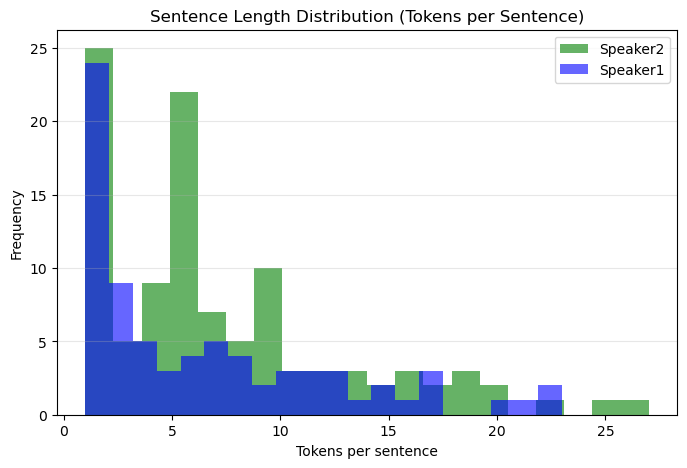

In [26]:
plt.figure(figsize=(8,5))
plt.hist(RA_sent_len, bins=20, alpha=0.6, color='green', label='Speaker2')
plt.hist(FR_sent_len, bins=20, alpha=0.6, color='blue', label='Speaker1')
plt.title("Sentence Length Distribution (Tokens per Sentence)")
plt.xlabel("Tokens per sentence")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

The graph shows exactly what it has been said above.

In [27]:
#function vs content words
print('Statistics for RA:')
print('--')
function_vs_content(RA_token_list)
print()
print('Statistics for FR:')
print('--')
fun, con = function_vs_content(FR_token_list) #ignore this line, i needed to store values from function

Statistics for RA:
--
Number of function words: 470
Number of content words: 299
Total tokens: 769

Function words proportion: 61.12%
Content words proportion: 38.88%

Statistics for FR:
--
Number of function words: 310
Number of content words: 185
Total tokens: 495

Function words proportion: 62.63%
Content words proportion: 37.37%


Comparison of function and content word between the two speakers doesn't really give us anything else to observe, rather than what is has already been said about general distribution of content vs function words.

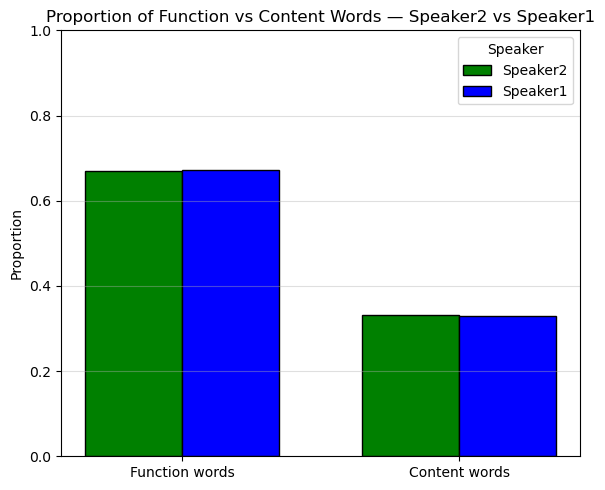

In [28]:
#plot

labels = ['Function words', 'Content words']

RA_values = [0.6689, 0.3311]
FR_values = [0.6714, 0.3286]

width = 0.35  #bar width
x_positions_RA = [i - width/2 for i in range(len(labels))]
x_positions_FR = [i + width/2 for i in range(len(labels))]

plt.figure(figsize=(6, 5))
plt.bar(x_positions_RA, RA_values, width, color='green', edgecolor='black', label='Speaker2')
plt.bar(x_positions_FR, FR_values, width, color='blue', edgecolor='black', label='Speaker1')

plt.xticks(range(len(labels)), labels)
plt.ylabel("Proportion")
plt.title("Proportion of Function vs Content Words — Speaker2 vs Speaker1")
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.4)
plt.legend(title="Speaker", loc='upper right')
plt.tight_layout()
plt.show()

In [60]:
#back to txt to operate with regex
with open("RA_clean.txt", "w", encoding="utf-8") as outfile:
    for line in clean_RA:
        outfile.write(line + "\n")

with open("RA_clean.txt", "r", encoding="utf-8") as f:
    RA_text_data = f.read()
    print(RA_text_data) 

reminisce
about a shared memory
which memory would you like
mh yeah we we'll probably spend more than five minutes finding a memory
uh
that was a good one
yeah
how do we do this
do you just launch into the memory?
i  don't know
yeah
no i like the memory
just tryin' to think of what like
it means
yeah i like that memory 'cause that was
when we were tryin' to figure out
it was our first trip
and it was like
can we have
you know can we travel together
you know what does it mean to travel together
we were super excited
ehm yeah yeah
and i remember we went to the airport
and i had my camera like strapped on my
chest we which i never do
but then i would do and i had like the cap on it i remember that
we had a lot of luggage
for how many days?
for four days we had two giant bags you're right
yeah
and then we went to
yeah we went up to the counter
and i don't even remember what happened
but was that the first time though i felt like it fell fo five or six times before that
yeah yeah so it was 

In [61]:
with open("FR_clean.txt", "w", encoding="utf-8") as outfile:
    for line in clean_FR:
        outfile.write(line + "\n")

with open("FR_clean.txt", "r", encoding="utf-8") as f:
    FR_text_data = f.read()
    print(FR_text_data) 

we just reminisce
eh
'kay
mh
but i'm tryin' to think which memory is
within five minutes because they're all short cute moments
okay i would
i don't know could be about the the camera cap
that s  on our first trip
to london a year ago
do we just launch into the memory
but do you remember how you lost the camera cap
at the airport check in
is that not a good memory
because
neck
we had a lot of luggage
for four days
for four days
i think you have you just picked up your camera and then the front cap of the camera fell into the belt
i think it fell off maybe a few times
the conveyer belt
into the machinery of the actual airport
s  it was

the first trip with blurry pictures
they end up blurred anyway 'cause i'm terrible at taking photos
and we're clumsy
but i feel like maybe today w because we've the cap is over there
and it still hasn't been cleaned
from having been down in the gutter at the air
tha y you see the cap was actually found
yesterday
and
it needs to be washed
and it just and 

In [62]:
#RA DISCOURSE MARKERS
print('Some RA discourse markers:')
print('--')
RA_text_clean = Text(RA_token_list)
print('Occurrences of LIKE:', RA_text_clean.count('like'))
print('Occurrences of WELL:', RA_text_clean.count('well'))
print('Occurrences of YEAH:', RA_text_clean.count('yeah'))
print('Occurrences of RIGHT:', RA_text_clean.count('right'))
print('Occurrences of LITERALLY:', RA_text_clean.count('literally'))
print('Occurrences of SO:', RA_text_clean.count('so'))
print('Occurrences of ANYWAY:', RA_text_clean.count('anyway'))
print('Occurrences of ACTUALLY:', RA_text_clean.count('actually'))

Some RA discourse markers:
--
Occurrences of LIKE: 23
Occurrences of WELL: 1
Occurrences of YEAH: 19
Occurrences of RIGHT: 7
Occurrences of LITERALLY: 4
Occurrences of SO: 9
Occurrences of ANYWAY: 0
Occurrences of ACTUALLY: 0


In [163]:
print('Some FR discourse markers:')
print('--')
FR_text_clean = Text(FR_token_list)
print('Occurrences of LIKE:', FR_text_clean.count('like'))
print('Occurrences of WELL:', FR_text_clean.count('well'))
print('Occurrences of YEAH:', FR_text_clean.count('yeah'))
print('Occurrences of RIGHT:', FR_text_clean.count('right'))
print('Occurrences of LITERALLY:', FR_text_clean.count('literally'))
print('Occurrences of SO:', FR_text_clean.count('so'))
print('Occurrences of ANYWAY:', FR_text_clean.count('anyway'))
print('Occurrences of ACTUALLY:', FR_text_clean.count('actually'))

Some FR discourse markers:
--
Occurrences of LIKE: 2
Occurrences of WELL: 0
Occurrences of YEAH: 7
Occurrences of RIGHT: 1
Occurrences of LITERALLY: 0
Occurrences of SO: 0
Occurrences of ANYWAY: 1
Occurrences of ACTUALLY: 2


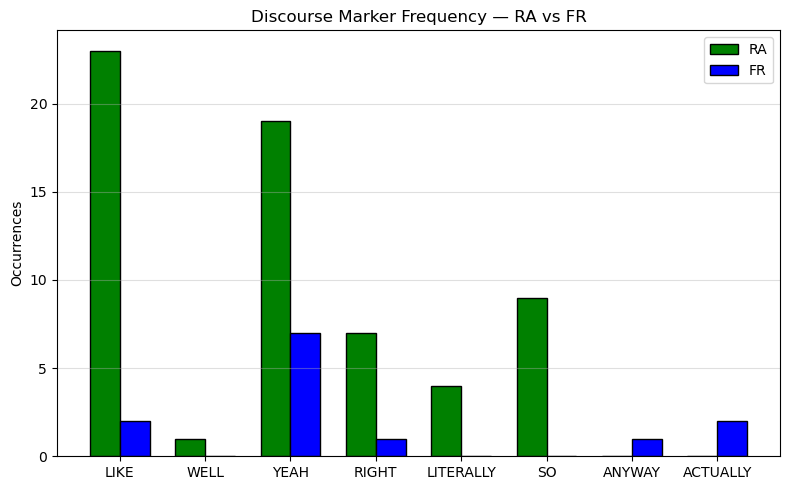

In [63]:
markers = ['like', 'well', 'yeah', 'right', 'literally', 'so', 'anyway', 'actually']

RA_text = Text(RA_token_list)
FR_text = Text(FR_token_list)

RA_counts = [RA_text.count(m) for m in markers]
FR_counts = [FR_text.count(m) for m in markers]

# --- plot ---
plt.figure(figsize=(8,5))

x = range(len(markers))
width = 0.35

plt.bar([i - width/2 for i in x], RA_counts, width=width, color='green', edgecolor='black', label='RA')
plt.bar([i + width/2 for i in x], FR_counts, width=width, color='blue', edgecolor='black', label='FR')

plt.xticks(x, [m.upper() for m in markers])
plt.ylabel("Occurrences")
plt.title("Discourse Marker Frequency — RA vs FR")
plt.legend()
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

The same discourse markers were investigated for both speakers. It is pretty evident that RA uses the investigated discourse markers way more often that FR. This might be due to the fact that RA is a native English speaker and FR is not, so RA might be more comfortable around non-traditional uses of some (filler) words.

In [167]:
RA_text_clean.concordance('like')

Displaying 23 of 23 matches:
shared memory which memory would you like mh yeah we we ll probably spend more
 the memory ? i don t know yeah no i like the memory just tryin to think of wh
e memory just tryin to think of what like it means yeah i like that memory cau
o think of what like it means yeah i like that memory cause that was when we w
out it was our first trip and it was like can we have you know can we travel t
t to the airport and i had my camera like strapped on my chest we which i neve
ver do but then i would do and i had like the cap on it i remember that we had
as that the first time though i felt like it fell fo five or six times before 
lt yes you re right right and it was like deep in s yeah and all i could think
ake this whole trip with the exposed like lens and i m clumsy very and we re c
bly build that airport so and it was like and then i remember askin the lady l
e and then i remember askin the lady like can i look for the cap and i thought
 say no i literally tho

In [168]:
FR_text_clean.concordance('like')

Displaying 2 of 2 matches:
g photos and we re clumsy but i feel like maybe today w because we ve the cap 
believe she didn t even attempt with like a pen maybe a magnet yeah yeah nothi


Concordance method on 'like' show some evidence of what it has been said above. Speaker FR uses only twice the word 'like', in a very traditional way (1. 'like' as in 'to feel like', 2. 'like' for making an example). Speaker RA uses it mostly as a discourse marker and filler. 